<a href="https://colab.research.google.com/github/Pradeeshkumar-U/TitanicSurvivalPrediction/blob/main/Titanic_Survival_Prediction_(Classifier).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# **Importing Basic Libraries**

In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Importing Sci-kit Learn Packages**

In [125]:
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from sklearn.preprocessing import StandardScaler,LabelEncoder

from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC

from sklearn.ensemble import RandomForestClassifier

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,classification_report,f1_score

#**Importing Dataset**

In [126]:
data =pd.read_csv('/Titanic-Dataset.csv')

#**Data Exploration**

In [127]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [128]:
data.shape

(891, 12)

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
data.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


#**Data Cleaning and Preprocessing**

In [132]:
data.Age.fillna(data['Age'].median(),inplace=True)

<ipython-input-132-3029eb31a84c>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Age.fillna(data['Age'].median(),inplace=True)


In [133]:
data.Sex.replace({'male':1,'female':0},inplace=True)

<ipython-input-133-1c137de97f05>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Sex.replace({'male':1,'female':0},inplace=True)
<ipython-input-133-1c137de97f05>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.Sex.replace({'male':1,'female':0},inplace=True)


In [134]:
data.Embarked.replace({'S':1,'C':0,'Q':2},inplace=True)

<ipython-input-134-7ffbf849ab3b>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data.Embarked.replace({'S':1,'C':0,'Q':2},inplace=True)
<ipython-input-134-7ffbf849ab3b>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data.Embarked.replace({'S':1,'C':0,'Q':2},inplace=True)


In [135]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Undersampling**

In [136]:
male = data[data['Sex']==1]
female = data[data['Sex']==0]

In [137]:
new_female = resample(female,n_samples=int(len(male)),random_state=42)

In [138]:
n_data = pd.concat([male,new_female])

In [139]:
new_data = n_data.sample(frac=1,random_state=42).reset_index(drop=True)

In [140]:
new_data['Sex'].value_counts()

,count
Sex,
0,577
1,577


In [141]:
new_data.drop(columns=['PassengerId','Name','Ticket','Cabin'],inplace=True)

#**Data Visualisation**

In [142]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  1154 non-null   int64  
 1   Pclass    1154 non-null   int64  
 2   Sex       1154 non-null   int64  
 3   Age       1154 non-null   float64
 4   SibSp     1154 non-null   int64  
 5   Parch     1154 non-null   int64  
 6   Fare      1154 non-null   float64
 7   Embarked  1154 non-null   float64
dtypes: float64(3), int64(5)
memory usage: 72.3 KB


**Before Resampling**

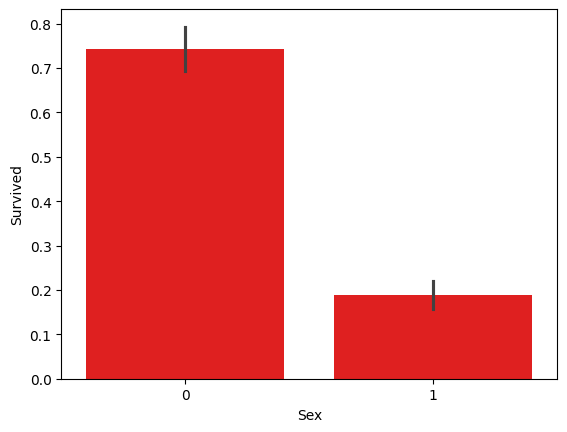

In [143]:
sns.barplot(x=data['Sex'],y=data['Survived'],color='red')
plt.show()

**After Resampling**

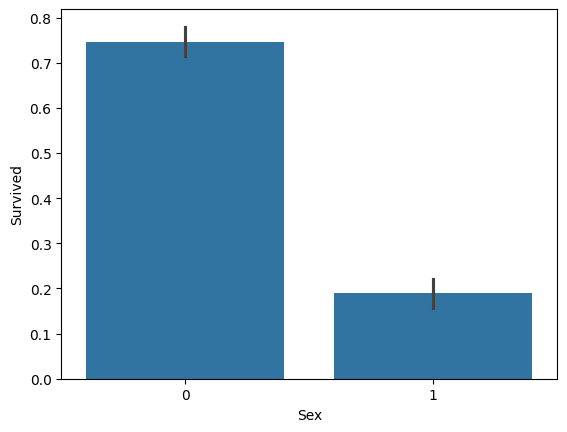

In [144]:
sns.barplot(x=new_data['Sex'],y=new_data['Survived'])
plt.show()

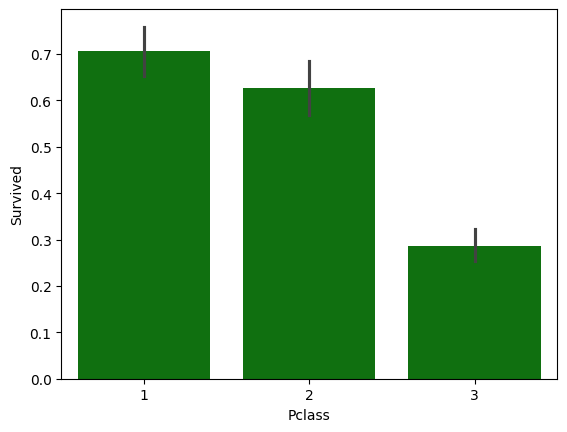

In [145]:
sns.barplot(x=new_data['Pclass'],y=new_data['Survived'],color='green')
plt.show()

#**Feature Extraction**

In [146]:
X=new_data.drop(columns=['Survived'])
y=new_data['Survived']

In [147]:
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=2,test_size=0.2)

**Scaling the data**

In [148]:
scaler = StandardScaler()
X_train_scale = scaler.fit_transform(X_train)
X_test_scale = scaler.transform(X_test)

#**Random Forest Model**

In [177]:
ran_model = RandomForestClassifier()
ran_model.fit(X_train_scale,y_train)
ran_predict = ran_model.predict(X_test_scale)
print('Accuracy score : ',accuracy_score(y_test,ran_predict),'\n\nF1 Score : ',f1_score(y_test,ran_predict),'\n\nClassification Report :\n',classification_report(y_test,ran_predict))

Accuracy score :  0.8831168831168831 

F1 Score :  0.8656716417910447 

Classification Report :
               precision    recall  f1-score   support

           0       0.89      0.91      0.90       129
           1       0.88      0.85      0.87       102

    accuracy                           0.88       231
   macro avg       0.88      0.88      0.88       231
weighted avg       0.88      0.88      0.88       231



#**Decision Tree Model**

In [185]:
dec_model = DecisionTreeClassifier()
dec_model.fit(X_train_scale,y_train)
dec_predict = dec_model.predict(X_test_scale)
print('Accuracy score : ',accuracy_score(y_test,dec_predict),'\n\nF1 Score : ',f1_score(y_test,dec_predict),'\n\nClassification Report :\n',classification_report(y_test,dec_predict))

Accuracy score :  0.8874458874458875 

F1 Score :  0.8737864077669902 

Classification Report :
               precision    recall  f1-score   support

           0       0.91      0.89      0.90       129
           1       0.87      0.88      0.87       102

    accuracy                           0.89       231
   macro avg       0.89      0.89      0.89       231
weighted avg       0.89      0.89      0.89       231



#**Support Vector Classification Model**

In [151]:
svc_model = SVC()
svc_model.fit(X_train_scale,y_train)
svc_predict = svc_model.predict(X_test_scale)
print('Accuracy score : ',accuracy_score(y_test,svc_predict),'\n\nF1 Score : ',f1_score(y_test,svc_predict),'\n\nClassification Report :\n',classification_report(y_test,svc_predict))

Accuracy score :  0.8528138528138528 

F1 Score :  0.8282828282828283 

Classification Report :
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       129
           1       0.85      0.80      0.83       102

    accuracy                           0.85       231
   macro avg       0.85      0.85      0.85       231
weighted avg       0.85      0.85      0.85       231



#**Logistic Regression Model**

In [152]:
log_model = LogisticRegression(random_state=3)
log_model.fit(X_train_scale,y_train)
log_predict = log_model.predict(X_test_scale)
print('Accuracy score : ',accuracy_score(y_test,log_predict),'\n\nF1 Score : ',f1_score(y_test,log_predict),'\n\nClassification Report :\n',classification_report(y_test,log_predict))

Accuracy score :  0.7792207792207793 

F1 Score :  0.7627906976744186 

Classification Report :
               precision    recall  f1-score   support

           0       0.83      0.76      0.79       129
           1       0.73      0.80      0.76       102

    accuracy                           0.78       231
   macro avg       0.78      0.78      0.78       231
weighted avg       0.78      0.78      0.78       231

